In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv('datasets/sales_data_sample.csv',encoding='unicode_escape')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [126]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [127]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

## Reducing dimensionality by dropping redundant columns

In [128]:
# Dropping redundant columns
drop_columns = ['CUSTOMERNAME', 'PHONE','ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME']
df.drop(columns=drop_columns, axis=1, inplace=True)

In [129]:
df.shape

(2823, 15)

In [130]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [131]:
df.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

## Converting categorical to quantitative values

In [132]:
# Converting categorical data to quantitative data

# Here are some of the benefits of converting categorical data to quantitative data 
# before performing K-means clustering:

# 1. It makes the clustering process more efficient and accurate.
# 2. It makes the results of the clustering analysis easier to interpret.
# 3. It allows you to use a wider range of distance metrics, such as Euclidean distance and Manhattan distance.
# Overall, it is generally recommended to convert categorical data to quantitative data before performing K-means clustering.


In [133]:
# Using OneHotEncoding for COUNTRY and PRODUCTLINE
df = pd.get_dummies(df, columns=['COUNTRY','PRODUCTLINE'], dtype=int)
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,0,0,1,0,1,0,0,0,0,0
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,0,0,0,0,1,0,0,0,0,0
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,0,0,0,0,1,0,0,0,0,0
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,0,0,1,0,1,0,0,0,0,0
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,0,0,0,0,0,0,1,0,0,0
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,0,0,0,0,0,0,1,0,0,0
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,0,0,0,0,0,0,1,0,0,0
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,0,0,0,0,0,0,1,0,0,0


In [134]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [135]:
# Using Label Encoding for DEAL SIZE

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['DEALSIZE'] = encoder.fit_transform(df['DEALSIZE'])

df['DEALSIZE']

0       2
1       2
2       1
3       1
4       1
       ..
2818    2
2819    1
2820    1
2821    2
2822    1
Name: DEALSIZE, Length: 2823, dtype: int64

In [136]:
df['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [137]:
# Using LabelEncoding for STATUS 
# Assigning 1 for success 2 for issues and 0 for in progress

status_map = {'Shipped':1, 'Disputed':2 , 'Cancelled': 2, 'On Hold': 2,'In Process': 0,'Resolved': 0}
df['STATUS'] = df['STATUS'].map(status_map)
df['STATUS']

0       1
1       1
2       1
3       1
4       1
       ..
2818    1
2819    1
2820    0
2821    1
2822    2
Name: STATUS, Length: 2823, dtype: int64

In [138]:
df.info()

# We need to convert object data types to integer for K Means Algorithm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ORDERNUMBER                   2823 non-null   int64  
 1   QUANTITYORDERED               2823 non-null   int64  
 2   PRICEEACH                     2823 non-null   float64
 3   ORDERLINENUMBER               2823 non-null   int64  
 4   SALES                         2823 non-null   float64
 5   ORDERDATE                     2823 non-null   object 
 6   STATUS                        2823 non-null   int64  
 7   QTR_ID                        2823 non-null   int64  
 8   MONTH_ID                      2823 non-null   int64  
 9   YEAR_ID                       2823 non-null   int64  
 10  MSRP                          2823 non-null   int64  
 11  PRODUCTCODE                   2823 non-null   object 
 12  DEALSIZE                      2823 non-null   int64  
 13  COU

In [139]:
len(df['PRODUCTCODE'].unique())

109

In [140]:
# Since number of unique product codes is more we will use LabelEncoding for PRODUCTCODE instead of OneHotEncoding
# Using OneHotEncoding will increase dimensions too much

df['PRODUCTCODE'] = encoder.fit_transform(df['PRODUCTCODE'])
df['PRODUCTCODE']

0         0
1         0
2         0
3         0
4         0
       ... 
2818    108
2819    108
2820    108
2821    108
2822    108
Name: PRODUCTCODE, Length: 2823, dtype: int64

## Converting remaining object data type to integer

In [141]:
# Converting object date data type numeric dates (object -> datetime -> int) 
# Integer datatype is required for scaling and K means

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['ORDERDATE'] = pd.to_numeric(df['ORDERDATE']).astype(int) / 10**9

In [142]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,10107,30,95.70,2,2871.00,1.046045e+09,1,1,2,2003,...,0,0,1,0,1,0,0,0,0,0
1,10121,34,81.35,5,2765.90,1.052266e+09,1,2,5,2003,...,0,0,0,0,1,0,0,0,0,0
2,10134,41,94.74,2,3884.34,1.057018e+09,1,3,7,2003,...,0,0,0,0,1,0,0,0,0,0
3,10145,45,83.26,6,3746.70,1.061770e+09,1,3,8,2003,...,0,0,1,0,1,0,0,0,0,0
4,10159,49,100.00,14,5205.27,1.065744e+09,1,4,10,2003,...,0,0,1,0,1,0,0,0,0,0


In [143]:
# Now we will remove further redundant columns 

# If you have two highly correlated columns in your dataset, and you include both of them in your K-means clustering
# model, the algorithm will be essentially using the same information twice. This can lead to overfitting and 
# can reduce the accuracy of the clustering results.

<Axes: >

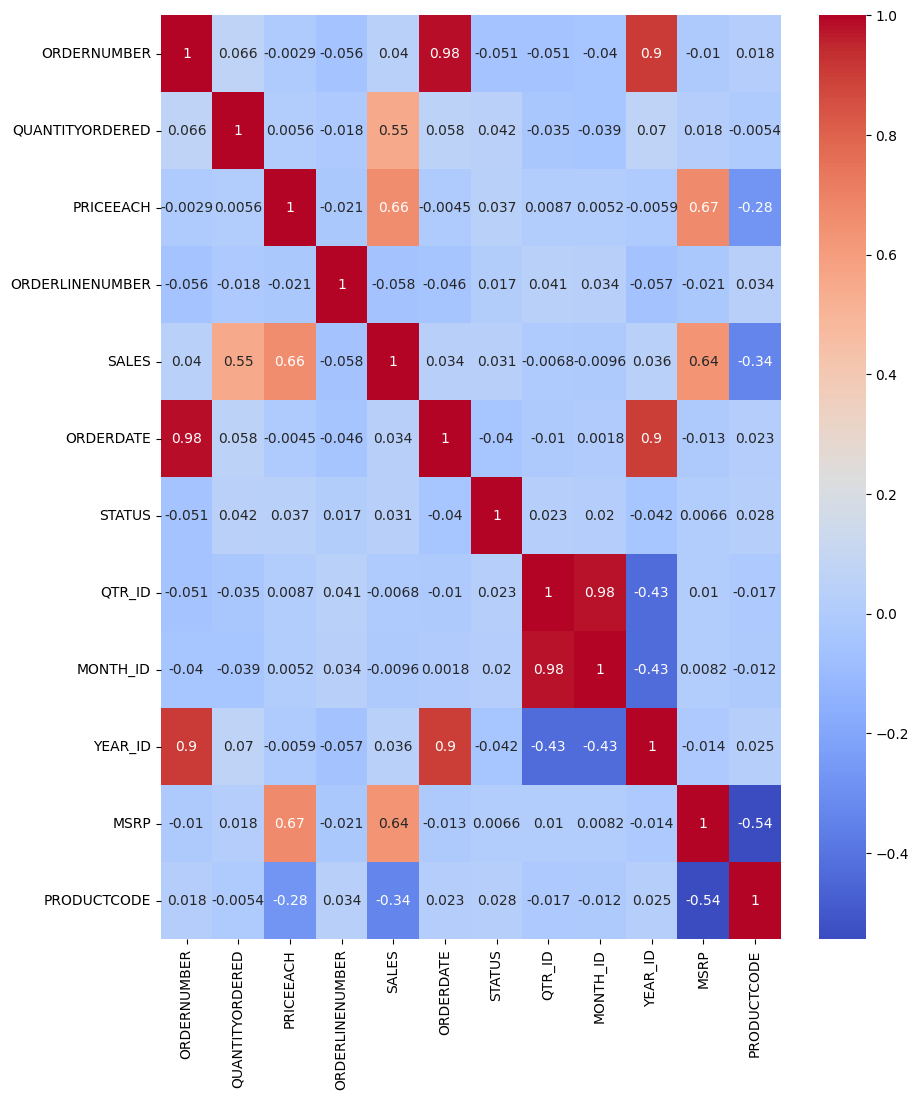

In [144]:
# Taking first 12 columns
plt.figure(figsize=(10,12))
sns.heatmap(df.iloc[:,:12].corr(), cmap='coolwarm', annot=True)

In [77]:
# Dropping highly correlated columns ORDERDATE [corr(YEAR_ID,ORDERDATE) = 0.9] and QTR_ID [corr(QTR_ID,MONTH_ID) = 0.98]

df.drop(columns=['ORDERDATE','QTR_ID'], axis=1, inplace=True)
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,10107,30,95.70,2,2871.00,1,2,2003,95,0,...,0,0,1,0,1,0,0,0,0,0
1,10121,34,81.35,5,2765.90,1,5,2003,95,0,...,0,0,0,0,1,0,0,0,0,0
2,10134,41,94.74,2,3884.34,1,7,2003,95,0,...,0,0,0,0,1,0,0,0,0,0
3,10145,45,83.26,6,3746.70,1,8,2003,95,0,...,0,0,1,0,1,0,0,0,0,0
4,10159,49,100.00,14,5205.27,1,10,2003,95,0,...,0,0,1,0,1,0,0,0,0,0


In [83]:
# Creating datasets for K Means and Hierarchical clustering
dfk = df.copy()
dfh = df.copy()

# K-Means Clustering

In [84]:
# Cleaning outliers as K Means is sensitive to outliers
# Probable outliers can be present in ['QUANTITYORDERED','PRICEEACH','SALES']

def clean_outlier(data):
    ninety = np.percentile(data, 90)
    ten = np.percentile(data, 10)
    
    data = np.where(data >= ninety, ninety, data)
    data = np.where(data <= ten, ten, data) 
    

outlier_colums = ['QUANTITYORDERED','PRICEEACH','SALES']
for col in outlier_colums:
    clean_outlier(dfk[col])

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfk_scaled = scaler.fit_transform(dfk)
dfk_scaled

array([[-1.64794709, -0.52289086,  0.5969775 , ..., -0.16745383,
        -0.34547029, -0.52337077],
       [-1.4958875 , -0.11220131, -0.11445035, ..., -0.16745383,
        -0.34547029, -0.52337077],
       [-1.35468931,  0.60650538,  0.54938372, ..., -0.16745383,
        -0.34547029, -0.52337077],
       ...,
       [ 1.38238338,  0.81185016,  0.81015797, ..., -0.16745383,
        -0.34547029, -0.52337077],
       [ 1.50185877, -0.11220131, -1.06186404, ..., -0.16745383,
        -0.34547029, -0.52337077],
       [ 1.68650256,  1.2225397 , -0.89925195, ..., -0.16745383,
        -0.34547029, -0.52337077]])

## Elbow Method

In [87]:
from sklearn.cluster import KMeans

In [96]:
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(dfk_scaled)
    wcss.append(kmeans.inertia_)

wcss

/home/pratham/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pratham/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pratham/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/pratham/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'au

[104451.00000000003,
 97286.57071516188,
 94470.07522087083,
 91015.4719285844,
 88161.34861885481,
 85759.74361080976,
 82786.1026688962,
 80494.49136365138,
 78082.32211426963,
 75134.74760360498,
 73409.74355965067,
 69464.93228844748,
 68122.41567910087,
 65890.24995093625,
 63342.516341367234]

Text(0.5, 0, 'K')

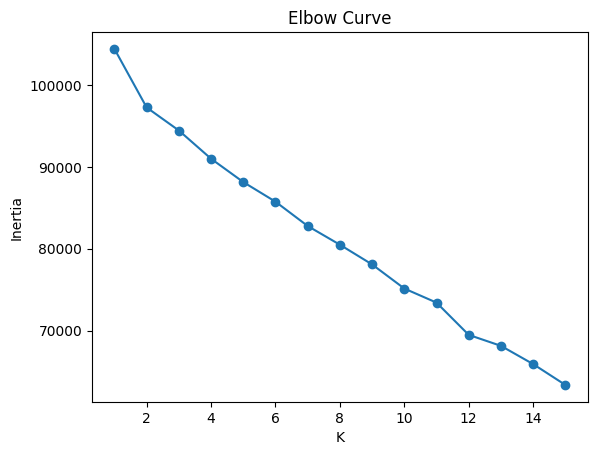

In [97]:
plt.plot(range(1,16),wcss, marker='o')
plt.title('Elbow Curve')
plt.ylabel('Inertia')
plt.xlabel('K')

In [119]:
kmeans = KMeans(n_clusters=12, init='k-means++')
kmeans.fit_predict(dfk_scaled)
labels = kmeans.labels_
labels

/home/pratham/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 3, 3, ..., 7, 7, 7], dtype=int32)

In [120]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=dfk.columns)
cluster_centers

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,0.082570,0.081943,0.142367,-0.153367,0.065149,-0.578242,-0.035235,0.030410,0.055497,-0.206998,...,-0.105371,-0.231843,-0.742934,0.236012,-0.081879,0.002237,-0.036861,-0.167454,-0.050918,-0.080814
1,0.156690,0.031376,-0.127901,0.145206,-0.214932,0.093469,-0.031827,0.173205,-0.316855,0.852444,...,-0.105371,0.039776,0.031058,-0.721812,-0.364452,2.868012,-0.300637,-0.167454,-0.345470,-0.523371
2,-0.053353,-0.193125,-0.623063,0.025750,-0.604892,0.016685,0.038672,-0.062077,-0.578924,0.011404,...,-0.052576,0.087001,0.098966,0.046292,-0.364452,-0.348674,-0.300637,-0.167454,-0.345470,1.023447
3,-0.005015,-0.014279,-0.054542,-0.101911,-0.098926,0.039735,-0.049624,0.045579,-0.181216,-0.130641,...,-0.105371,-0.118620,0.342427,-0.721812,2.743848,-0.348674,-0.300637,-0.167454,-0.345470,-0.523371
4,-0.033408,0.223246,0.686830,-0.029085,0.873914,0.049101,0.015944,-0.053575,0.995151,-0.641310,...,0.281317,0.012371,0.083291,1.184116,-0.327338,-0.334271,-0.300637,-0.167454,-0.345470,-0.330826
5,-0.030836,0.069740,0.190511,-0.025059,0.091851,-0.134713,0.095384,-0.066769,0.030594,-0.058481,...,-0.105371,-0.098164,0.117221,-0.721812,-0.364452,-0.348674,-0.300637,-0.167454,2.894605,-0.523371
6,0.326739,0.033909,-0.057189,0.117244,0.035146,-0.039370,-0.603897,0.539232,-0.013022,0.158201,...,-0.105371,-0.231843,-0.742934,-0.397625,0.173523,0.641076,0.048105,0.068671,-0.158543,-0.102091
7,-0.041531,-0.017241,0.011342,0.049676,-0.263159,0.221527,-0.029141,-0.010834,-0.364247,1.140759,...,-0.105371,0.258942,-0.056426,-0.721812,-0.364452,-0.348674,3.326275,-0.167454,-0.345470,-0.523371
8,0.378198,-0.261543,0.190162,-0.354187,-0.145888,-0.600695,-0.381699,0.524237,0.008588,0.135762,...,-0.105371,-0.231843,-0.742934,-0.466392,-0.364452,-0.251198,0.908334,0.390660,-0.345470,0.509262
9,-0.054716,-0.458721,0.122217,-0.450563,0.030348,-0.039370,-0.555241,0.264328,0.153293,0.248632,...,-0.105371,-0.231843,-0.742934,0.068393,0.024086,0.455498,-0.300637,0.599952,-0.142966,-0.371242


## Hierarchical Clustering

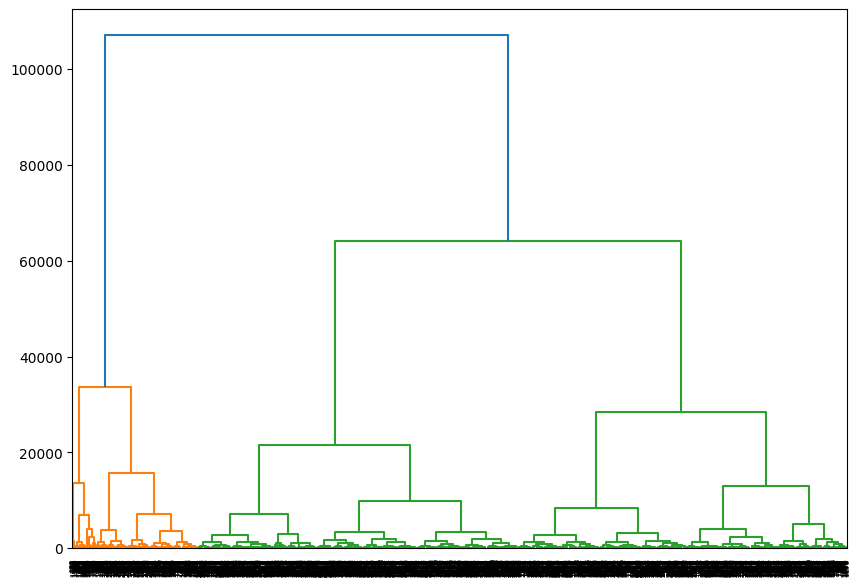

In [105]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(dfh, method='ward'))

In [108]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(dfh)

/home/pratham/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [109]:
labels

array([8, 8, 3, ..., 1, 9, 0])